In [1]:
#Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import math
from pathlib import Path
import seaborn as sns
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from sklearn.model_selection import train_test_split
from dmba import classificationSummary

no display found. Using non-interactive Agg backend


In [2]:
#Directory
working_directory = os.getcwd()
print(working_directory)

/Users/pouyasohrab


In [3]:
#Directory
path = working_directory + '/dmba/Voter-Persuasion.csv'
df = pd.read_csv(path)

In [4]:
#Analyzing the Data Set
df.head(1000)

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,...,CAND2S,MESSAGE_A,MESSAGE_A_REV,I3,CAND1_UND,CAND2_UND,MOVED_AD,MOVED_A,opposite,Partition
0,193801,2,0,28,1,1,1,37,61,34,...,S,1,0,N,N,N,N,0,1,V
1,627701,1,0,53,2,0,0,46,87,8,...,S,1,0,N,N,N,N,0,1,T
2,306924,2,0,68,2,1,0,41,23,64,...,L,1,0,N,N,N,Y,1,0,T
3,547609,1,0,66,0,2,0,35,53,29,...,S,1,0,N,N,N,N,0,1,T
4,141105,3,0,23,0,3,1,42,74,18,...,S,1,0,N,N,N,N,0,1,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,255861,1,0,29,1,1,0,34,58,32,...,S,1,0,N,N,N,N,0,1,T
996,449553,3,0,34,0,0,2,37,61,34,...,L,1,0,Y,N,N,Y,1,0,V
997,35050,2,0,59,9,9,9,33,31,61,...,L,1,0,Y,N,N,Y,1,0,V
998,402276,1,0,72,0,0,4,43,69,23,...,L,1,0,Y,N,N,Y,1,0,T


In [5]:
df.columns

Index(['VOTER_ID', 'SET_NO', 'OPP_SEX', 'AGE', 'HH_ND', 'HH_NR', 'HH_NI',
       'MED_AGE', 'NH_WHITE', 'NH_AA', 'NH_ASIAN', 'NH_MULT', 'HISP',
       'COMM_LT10', 'COMM_609P', 'MED_HH_INC', 'COMM_CAR', 'COMM_CP',
       'COMM_PT', 'COMM_WALK', 'KIDS', 'M_MAR', 'F_MAR', 'ED_4COL', 'GENDER_F',
       'GENDER_M', 'H_AFDLN3P', 'H_F1', 'H_M1', 'H_MFDLN3P', 'PARTY_D',
       'PARTY_I', 'PARTY_R', 'VPP_08', 'VPP_12', 'VPR_08', 'VPR_10', 'VPR_12',
       'VG_04', 'VG_06', 'VG_08', 'VG_10', 'VG_12', 'PP_PELIG', 'PR_PELIG',
       'AP_PELIG', 'G_PELIG', 'E_PELIG', 'NL5G', 'NL3PR', 'NL5AP', 'NL2PP',
       'REG_DAYS', 'UPSCALEBUY', 'UPSCALEMAL', 'UPSCALEFEM', 'BOOKBUYERI',
       'FAMILYMAGA', 'FEMALEORIE', 'RELIGIOUSM', 'GARDENINGM', 'CULINARYIN',
       'HEALTHFITN', 'DOITYOURSE', 'FINANCIALM', 'RELIGIOUSC', 'POLITICALC',
       'MEDIANEDUC', 'CAND1S', 'CAND2S', 'MESSAGE_A', 'MESSAGE_A_REV', 'I3',
       'CAND1_UND', 'CAND2_UND', 'MOVED_AD', 'MOVED_A', 'opposite',
       'Partition'],
      dt

In [6]:
df.dtypes

VOTER_ID      int64
SET_NO        int64
OPP_SEX       int64
AGE           int64
HH_ND         int64
              ...  
CAND2_UND    object
MOVED_AD     object
MOVED_A       int64
opposite      int64
Partition    object
Length: 79, dtype: object

In [7]:
df.describe()

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,...,HEALTHFITN,DOITYOURSE,FINANCIALM,RELIGIOUSC,POLITICALC,MEDIANEDUC,MESSAGE_A,MESSAGE_A_REV,MOVED_A,opposite
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,313104.361200,2.005900,0.587400,50.869700,1.211800,0.728700,0.612000,39.161700,66.369000,21.679100,...,0.973400,0.045100,0.143800,0.528300,0.53110,12.602800,0.500000,0.500000,0.373400,0.626600
std,183295.514014,0.817883,5.397506,18.151514,1.310005,1.062172,0.927331,6.897558,19.680711,17.922613,...,0.676859,0.330571,0.461891,0.514806,0.52121,1.090207,0.500025,0.500025,0.483731,0.483731
min,13.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,25.000000,23.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,152718.500000,1.000000,0.000000,36.000000,0.000000,0.000000,0.000000,34.000000,58.000000,5.000000,...,1.000000,0.000000,0.000000,0.000000,0.00000,12.000000,0.000000,0.000000,0.000000,0.000000
50%,310684.000000,2.000000,0.000000,51.000000,1.000000,0.000000,0.000000,38.000000,65.000000,17.000000,...,1.000000,0.000000,0.000000,1.000000,1.00000,12.000000,0.500000,0.500000,0.000000,1.000000
75%,470628.500000,3.000000,0.000000,64.000000,2.000000,1.000000,1.000000,44.000000,85.000000,30.000000,...,1.000000,0.000000,0.000000,1.000000,1.00000,13.000000,1.000000,1.000000,1.000000,1.000000
max,636334.000000,3.000000,86.000000,100.000000,9.000000,9.000000,9.000000,65.000000,99.000000,64.000000,...,9.000000,8.000000,9.000000,7.000000,7.00000,16.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isna()

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,...,CAND2S,MESSAGE_A,MESSAGE_A_REV,I3,CAND1_UND,CAND2_UND,MOVED_AD,MOVED_A,opposite,Partition
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
#21.4 #1
#View Flyer Variable
df['MESSAGE_A']

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: MESSAGE_A, Length: 10000, dtype: int64

In [10]:
#View Target Variable
df['MOVED_AD']

0       N
1       N
2       Y
3       N
4       N
       ..
9995    N
9996    Y
9997    N
9998    N
9999    Y
Name: MOVED_AD, Length: 10000, dtype: object

In [11]:
#Replacing N=0 and Y=1
df['MOVED_AD'] = df['MOVED_AD'].replace({"N": 0, "Y": 1})

In [12]:
#Find count of all voters in dataset
sum_of_voters = df.shape[0]
print(sum_of_voters)

10000


In [13]:
#Calculation
gotflyer = df[(df['MESSAGE_A'] == 1) & (df['MOVED_AD'] == 1)].shape[0]
noflyer = df[(df['MESSAGE_A'] == 0) & (df['MOVED_AD'] == 1)].shape[0]

flyer_moved = (gotflyer / sum_of_voters) * 100
no_flyer_moved = (noflyer / sum_of_voters) * 100

In [14]:
#Count of each conditions
print("Number of records with MESSAGE_A = 1 and MOVED_AD = 1:", gotflyer)
print("Number of records with MESSAGE_A = 0 and MOVED_AD = 1:", noflyer)

Number of records with MESSAGE_A = 1 and MOVED_AD = 1: 2012
Number of records with MESSAGE_A = 0 and MOVED_AD = 1: 1722


In [15]:
#Results
print("Voters that got a flyer and moved: " + str(flyer_moved))
print("Voters that did not get a flyer and moved: " + str(no_flyer_moved))

Voters that got a flyer and moved: 20.119999999999997
Voters that did not get a flyer and moved: 17.22


In [35]:
#21.4 Response #1
print("Flyers help slighlty in moving voters in a Democratic direction. It results in moving roughly 3% more voters in the Democratic direction.")

Flyers help slighlty in moving voters in a Democratic direction. It results in moving roughly 3% more voters in the Democratic direction.


In [19]:
#21.4 #2
#Find Correlation of variables with Target Variable
corr = df.corr(numeric_only=True)
corr

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,...,DOITYOURSE,FINANCIALM,RELIGIOUSC,POLITICALC,MEDIANEDUC,MESSAGE_A,MESSAGE_A_REV,MOVED_AD,MOVED_A,opposite
VOTER_ID,1.000000,0.004829,0.013711,0.001071,-0.021323,0.020304,-0.006341,-0.001775,-0.008064,0.012011,...,-0.002974,0.002522,0.009873,0.015555,0.011065,-0.016615,0.016615,-0.004956,-0.004956,0.004956
SET_NO,0.004829,1.000000,-0.003911,-0.005876,0.001167,-0.024635,0.009744,0.016761,0.008178,-0.000819,...,0.001605,-0.001187,-0.011441,-0.010636,-0.002419,-0.005502,0.005502,0.005553,0.005553,-0.005553
OPP_SEX,0.013711,-0.003911,1.000000,0.009523,-0.003552,0.015257,0.002180,0.002029,0.012733,-0.003313,...,-0.010925,0.016420,-0.003176,-0.001304,0.014092,-0.012043,0.012043,-0.006487,-0.006487,0.006487
AGE,0.001071,-0.005876,0.009523,1.000000,-0.111906,-0.030063,-0.092572,0.098188,0.073202,-0.073316,...,0.098017,0.081000,0.004413,0.018986,0.025479,0.012512,-0.012512,-0.026237,-0.026237,0.026237
HH_ND,-0.021323,0.001167,-0.003552,-0.111906,1.000000,-0.280483,-0.074276,-0.083083,-0.169724,0.165693,...,-0.036379,-0.056621,0.030113,0.032243,-0.077080,-0.024734,0.024734,0.259323,0.259323,-0.259323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MESSAGE_A,-0.016615,-0.005502,-0.012043,0.012512,-0.024734,0.007626,-0.008196,-0.011468,0.003567,-0.009078,...,0.008773,0.008660,-0.004856,0.002878,0.004036,1.000000,-1.000000,0.059954,0.059954,-0.059954
MESSAGE_A_REV,0.016615,0.005502,0.012043,-0.012512,0.024734,-0.007626,0.008196,0.011468,-0.003567,0.009078,...,-0.008773,-0.008660,0.004856,-0.002878,-0.004036,-1.000000,1.000000,-0.059954,-0.059954,0.059954
MOVED_AD,-0.004956,0.005553,-0.006487,-0.026237,0.259323,-0.279504,0.028714,-0.014111,-0.096613,0.077222,...,-0.019015,-0.003558,0.022621,0.028510,-0.014954,0.059954,-0.059954,1.000000,1.000000,-1.000000
MOVED_A,-0.004956,0.005553,-0.006487,-0.026237,0.259323,-0.279504,0.028714,-0.014111,-0.096613,0.077222,...,-0.019015,-0.003558,0.022621,0.028510,-0.014954,0.059954,-0.059954,1.000000,1.000000,-1.000000


In [20]:
#Correlation of variables ranked
corr_with_target = corr['MOVED_AD'].abs().sort_values(ascending=False)

top_predictors = corr_with_target[3:]

print("Top predictors of 'MOVED_AD':")
print(top_predictors)

Top predictors of 'MOVED_AD':
PARTY_R       0.415191
PARTY_D       0.345692
HH_NR         0.279504
HH_ND         0.259323
VPP_12        0.171780
                ...   
VOTER_ID      0.004956
BOOKBUYERI    0.004192
FINANCIALM    0.003558
VG_04         0.002153
VG_06         0.001298
Name: MOVED_AD, Length: 70, dtype: float64


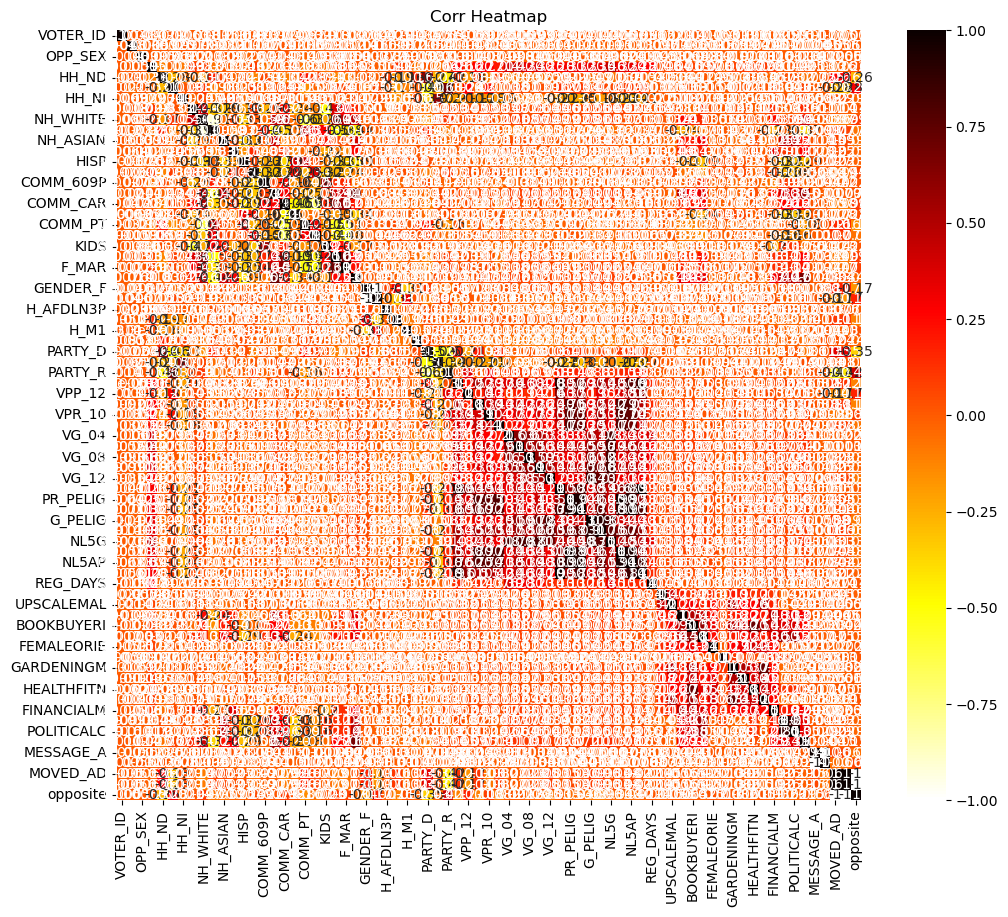

In [21]:
#Heatmap
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='hot_r')
plt.title('Corr Heatmap')
plt.show()

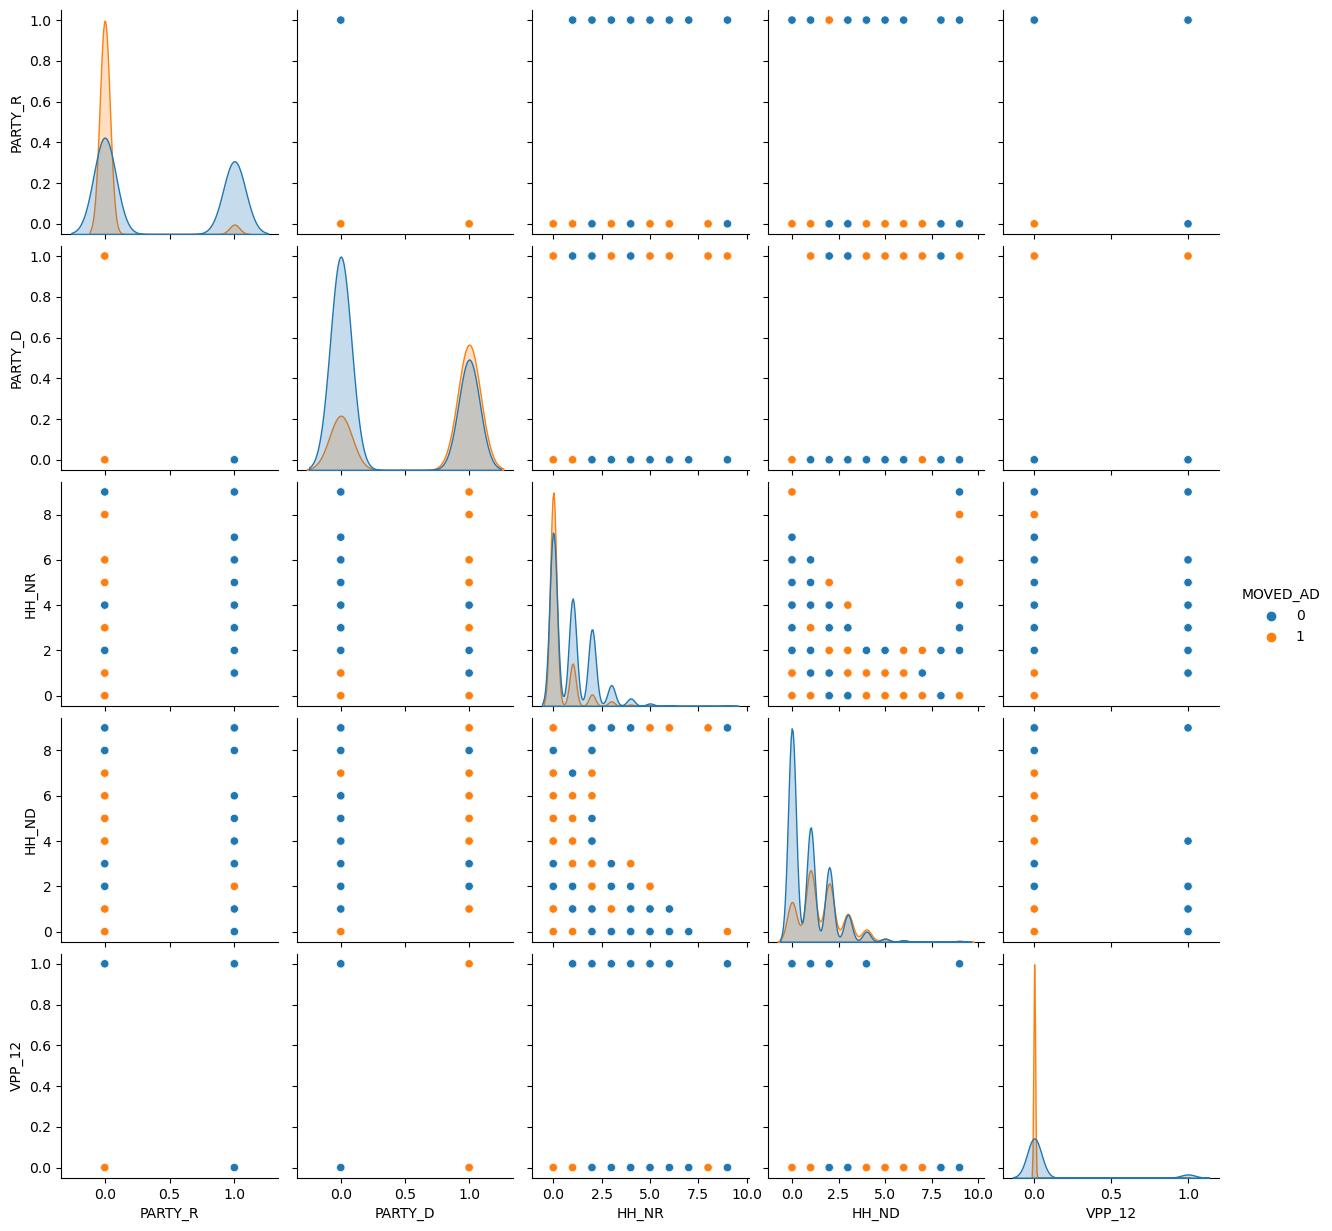

In [23]:
#Pairplot
sns.pairplot(df, vars=['PARTY_R', 'PARTY_D', 'HH_NR', 'HH_ND', 'VPP_12'], hue='MOVED_AD')
plt.show()     

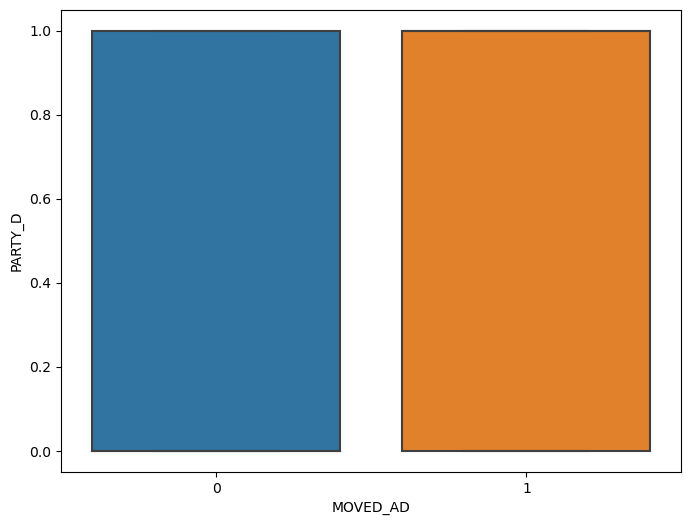

In [24]:
#Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='MOVED_AD', y='PARTY_D', data=df)
plt.show()

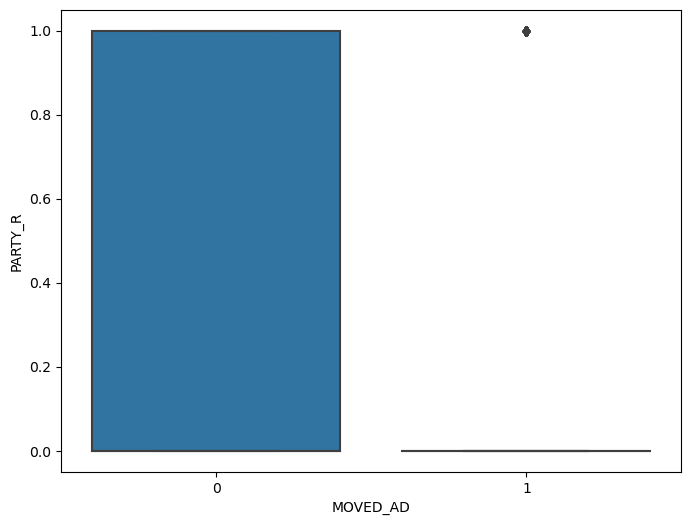

In [25]:
#Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='MOVED_AD', y='PARTY_R', data=df)
plt.show()

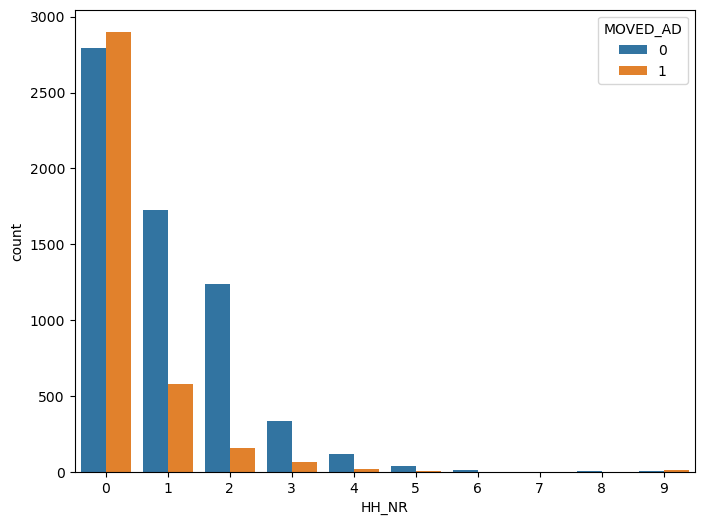

In [26]:
#Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='HH_NR', hue='MOVED_AD', data=df)
plt.show()

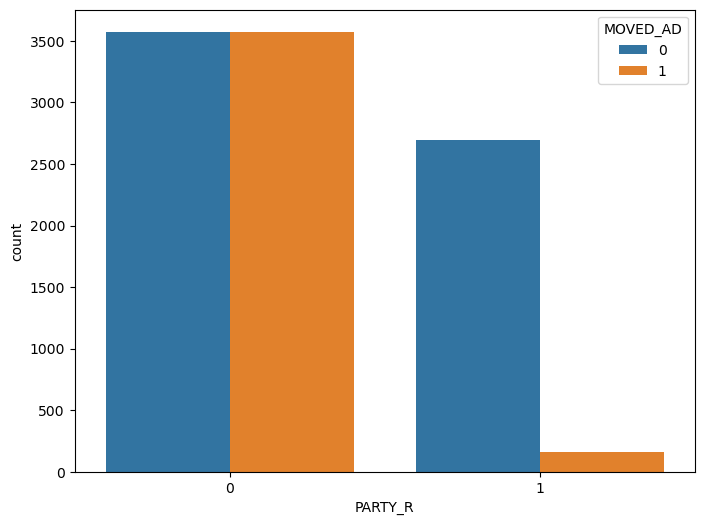

In [27]:
#Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='PARTY_R', hue='MOVED_AD', data=df)
plt.show()

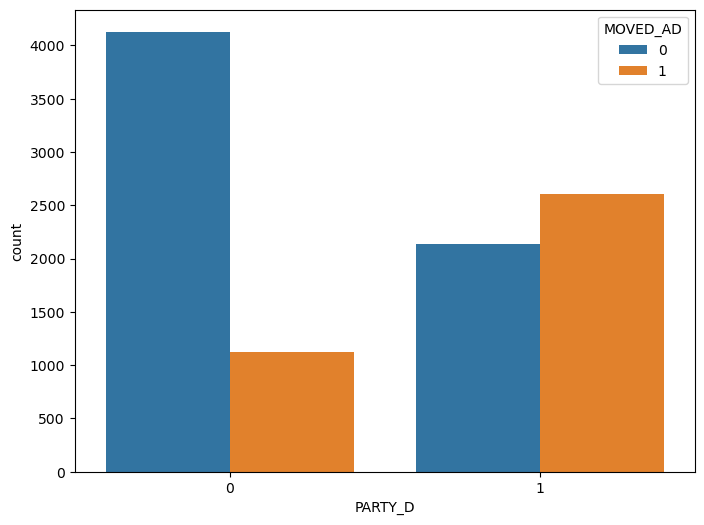

In [28]:
#Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='PARTY_D', hue='MOVED_AD', data=df)
plt.show()

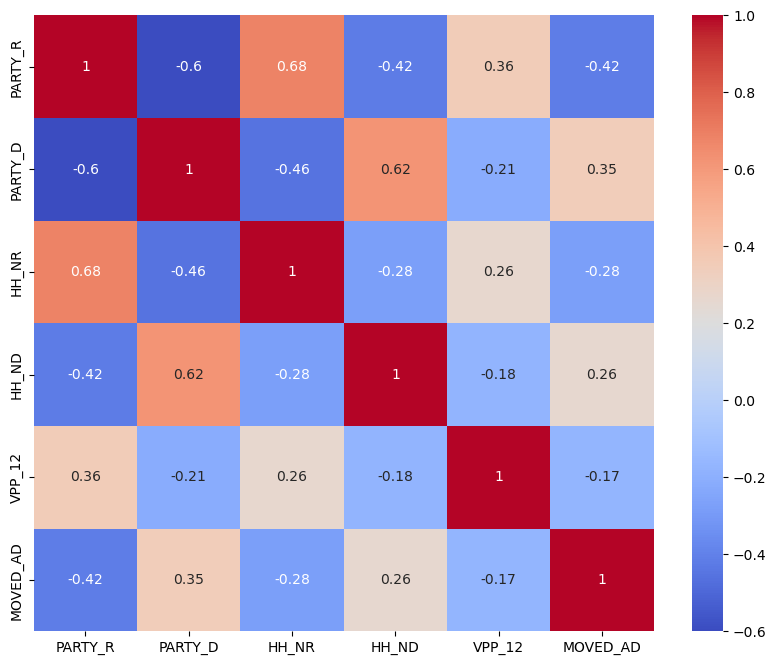

In [29]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['PARTY_R', 'PARTY_D', 'HH_NR', 'HH_ND', 'VPP_12', 'MOVED_AD']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [31]:
#21.4 Response #2
response2 = "The predictors with good predictive potential for Moved_AD, based on the charts and visualizations are:\n1. Party_R (Negative Correlation of -0.42)\n2. Party_D (Positive Correlation of 0.35)\n3. HH_NR (Negative Weak Correlation of -0.28)\n4. HH_ND (Positive Weak Correlation of 0.26)"
print(response2)

The predictors with good predictive potential for Moved_AD, based on the charts and visualizations are:
1. Party_R (Negative Correlation of -0.42)
2. Party_D (Positive Correlation of 0.35)
3. HH_NR (Negative Weak Correlation of -0.28)
4. HH_ND (Positive Weak Correlation of 0.26)
